<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/Types-of-Features/EDA_Functions_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
# This is the Ames data after the week 5 cleaning steps (still has null values)
fpath="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/Prepped-ames-housing-dojo-for-ml.csv"
df = pd.read_csv(fpath)
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,...,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice,Month,Year,Total Half Baths,Total Full Baths
0,907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,...,TA,TA,Y,MnPrv,03-2006,119900.0,3,2006,0.0,1.0
1,527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,...,TA,TA,Y,NaN,03-2006,320000.0,3,2006,1.0,3.0
2,534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,...,TA,TA,Y,NaN,04-2007,151500.0,4,2007,0.0,1.0
3,528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,...,TA,TA,Y,NaN,06-2008,385000.0,6,2008,0.0,3.0
4,533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,...,TA,TA,Y,NaN,02-2007,193800.0,2,2007,0.0,3.0


In [107]:
#Setting PID as the index
df = df.set_index("PID")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 907227090 to 902201120
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MS Zoning         2930 non-null   object 
 1   Lot Frontage      2440 non-null   float64
 2   Lot Area          2930 non-null   int64  
 3   Street            2930 non-null   object 
 4   Alley             198 non-null    object 
 5   Utilities         2930 non-null   object 
 6   Neighborhood      2930 non-null   object 
 7   Bldg Type         2930 non-null   object 
 8   House Style       2930 non-null   object 
 9   Overall Qual      2930 non-null   int64  
 10  Overall Cond      2930 non-null   int64  
 11  Year Built        2930 non-null   int64  
 12  Year Remodeled    2930 non-null   int64  
 13  Exter Qual        2930 non-null   object 
 14  Exter Cond        2930 non-null   object 
 15  Bsmt Unf Sqft     2929 non-null   float64
 16  Total Bsmnt Sqft  2929 non-nu

## Make a Temporary Copy of the Dataframe for EDA

In [108]:
# Copy of dataframe just for visualization and EDA
temp_df = df.copy()

## Fill in missing values with a placeholder

In [109]:
# Let's start with Alley
x = "Alley"
placeholder = "Missing"
# In our temporatory df, we will fill in the missing values in the Alley column with the placeholder, MISSING
temp_df[x] = temp_df[x].fillna(placeholder)

## Making a Countplot

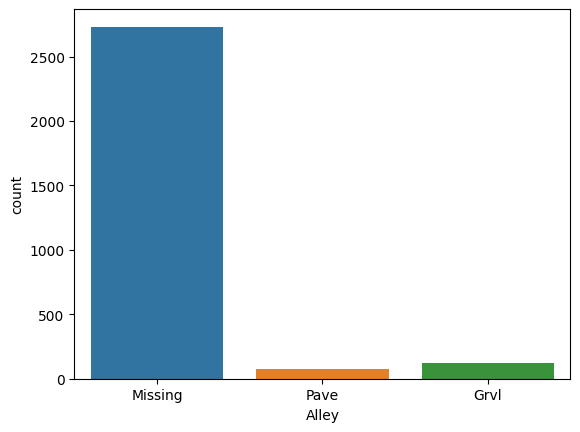

In [110]:
# Plotting a count plot 
sns.countplot(temp_df, x=x);

## Customize the Plot

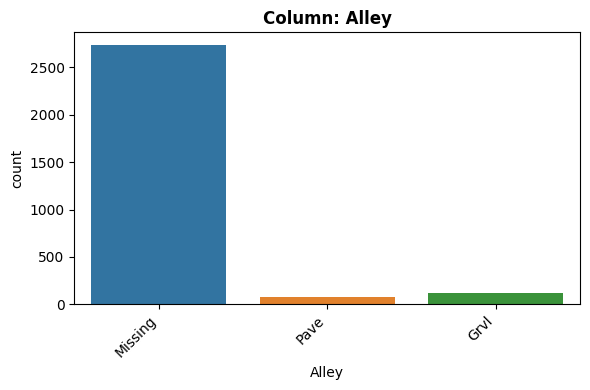

In [111]:
# Create figure with desired figsize
fig, ax = plt.subplots(figsize=(6,4))
# Plotting a count plot 
sns.countplot(temp_df, x=x, ax=ax)
# Rotate Tick Labels for long names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# Add a title with the feature name included
ax.set_title(f"Column: {x}", fontweight="bold")
fig.tight_layout();

In [112]:
def explore_categorical(df, x, fillna=True, placeholder = "Missing"):
    #Make a copy of the dataframe and fillna 
    temp_df = df.copy()
    # Fill in missing values with placeholder
    temp_df[x] = temp_df[x].fillna(placeholder)
    # Create figure with desired figsize
    fig, ax = plt.subplots(figsize=(6,4))
    # Plotting a count plot 
    sns.countplot(temp_df, x=x, ax=ax)
    # Rotate Tick Labels for long names
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_title(f"Column: {x}");
    fig.tight_layout()

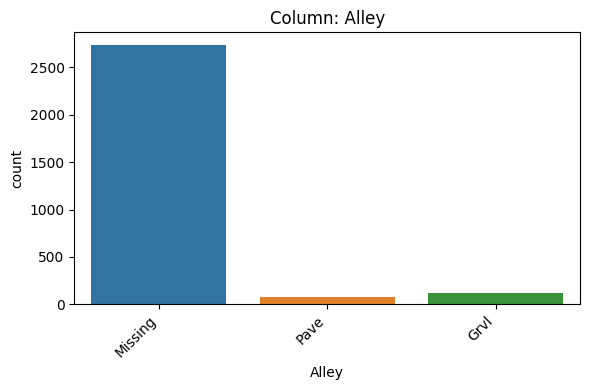

In [113]:
# Test our function on Alley
explore_categorical(df, "Alley");

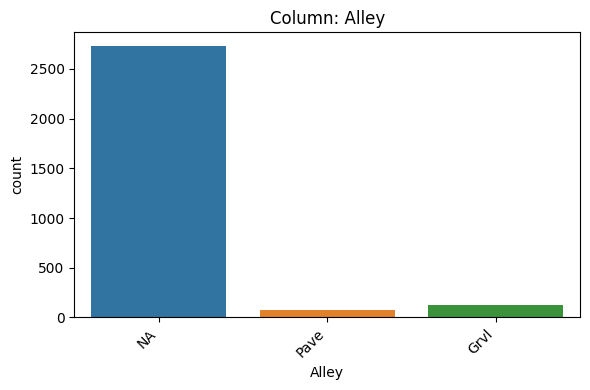

In [114]:
#Trying a different placeholder than default of "Missing"
explore_categorical(df, "Alley", placeholder="NA")

## Include Keyword Argument for fillna



In [115]:
def explore_categorical(df, x, fillna=True, placeholder="Missing"):
    # Make a copy of the dataframe and fillna 
    temp_df = df.copy()
    # fill NA with placeholder
    if fillna == True:
        temp_df[x] = temp_df[x].fillna(placeholder)
        # Create figure with desired figsize
        fig, ax = plt.subplots(figsize=(6,4))
        # Plotting a count plot 
        sns.countplot(temp_df, x, ax=ax)
        # Rotate Tick Labels for long names
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        # Add a title with the feature name included
        ax.set_title(f"Column: {x}");
        fig.tight_layout()

In [116]:
#Using custom function to 
explore_categorical(df, "Alley", fillna=False)

## Include Keyword Argument for figsize and return fig, ax

In [117]:
def explore_categorical(df, x, fillna=True, placeholder="Missing",
                        figsize=(6,4)):
    # Make a copy of the dataframe and fillna
    df = df.copy() 
    # fill NA with placeholder
    if fillna == True:
        temp_df[x] = temp_df[x].fillna(placeholder)                  
        # Create figure with desired figsize
        fig, ax = plt.subplots(figsize=(6,4))
        # Plotting a count plot 
        sns.countplot(temp_df, x=x)
        # Rotate Tick Labels for long names
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        # Add a title with the feature name included
        ax.set_title(f"Column: {x}", fontweight="bold")
        fig.tight_layout()
        return fig, ax

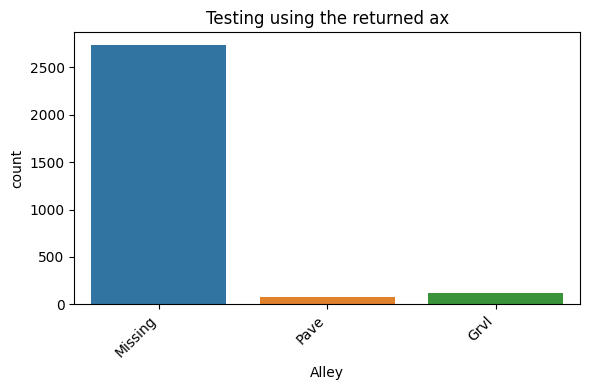

In [118]:
fig, ax = explore_categorical(df, "Alley", figsize=(5,3))
ax.set_title("Testing using the returned ax");

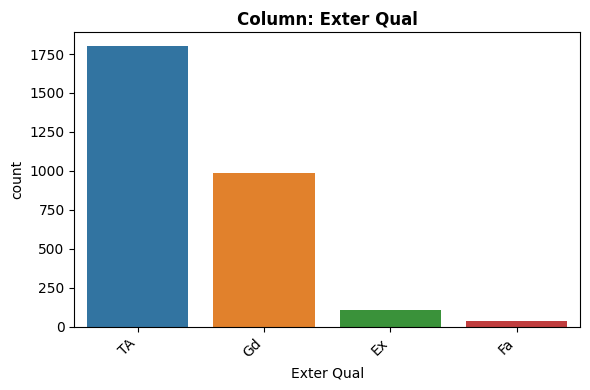

In [119]:
# Test our function on Exter Qual
explore_categorical(df, x="Exter Qual");

## Include Keyword Argument for Order


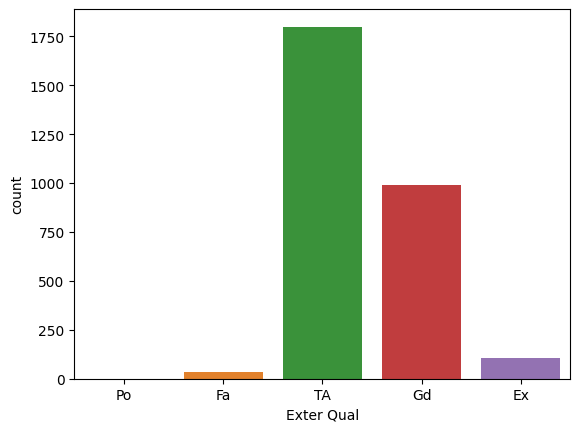

In [120]:
# Saving a list of the possible categories in order 
qual_order = ["Po", "Fa", "TA", "Gd", "Ex"]
# Using the order argument in our countplot
sns.countplot(df, x="Exter Qual", order=qual_order);

You'll see "Po" is still included even though it has a value of 0.

In [121]:
#Check the value of "Po"
df['Exter Qual'].value_counts(dropna=False)

TA    1799
Gd     989
Ex     107
Fa      35
Name: Exter Qual, dtype: int64

In [122]:
def explore_categorical(df, x, fillna=True, placeholder="Missing",
                        figsize=(6,4), order=None):
  # Make a copy of the dataframe and fillna 
    df_temp = df.copy()
  # fillna with placeholder
    if fillna == True:
        df_temp[x] = df_temp[x].fillna(placeholder)
  # Create figure with desired figsize
    fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot 
    sns.countplot(df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
  # Add a title with the feature name included
    ax.set_title(f"Column: {x}", fontweight="bold")
    fig.tight_layout()
    return fig, ax

Testing the function without and with order.

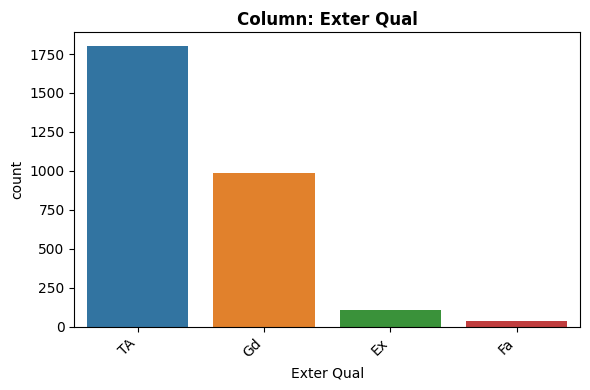

In [123]:
explore_categorical(df, "Exter Qual");

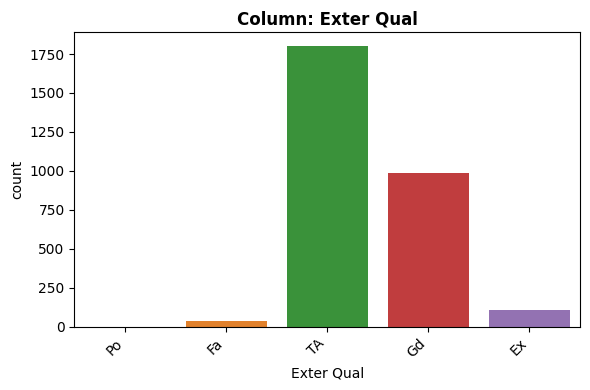

In [124]:
# Checking Exter Qual with order
qual_order = ['Po','Fa','TA','Gd','Ex']
# Use the order argument in our function
explore_categorical(df, "Exter Qual", order=qual_order);

## 1) How many missing values are present (both the count and percentage)?

In [125]:
# Let's practice on Alley
x = "Alley"
# Before filling in the NA values with a placeholder, let's get the missing value count and percentage
temp_df = df.copy()
# Save null values counts 
null_count = temp_df[x].isna().sum()
# Calculate the percentage of null values
null_percent = null_count/len(temp_df) * 100
# Print the null value info with an f-statement
print(f"- NaNs Found: {null_count} ({round(null_percent,2)})%")

- NaNs Found: 2732 (93.24)%


## 2) How many different classes are there?

The number of unique values in each feature is known as the feature's cardinality.

In [126]:
# Print cardinality info
nunique = temp_df[x].nunique()
print(f"— Unique Values: {nunique}")

— Unique Values: 2


## 3) What is the most common value and how often does it occur?

We will start by obtaining the value counts of the feature. We will allow null values to be included by using dropna = False.

In [127]:
val_counts = temp_df[x].value_counts(dropna=False)
val_counts

NaN     2732
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [128]:
# Check the data type of this output to see what method we can use to get the most common value
type(val_counts)

pandas.core.series.Series

In [129]:
# Isolate the name of the most common value by using the index (key)
most_common_val = val_counts.index[0]
most_common_val

nan

In [130]:
# Isolate the number of entries having the most common value by using .values
freq  = val_counts.values[0]
freq

2732

In [132]:
perc_most_common = freq / len(temp_df) * 100
perc_most_common

93.24232081911262

In [136]:
# Include a print statement and round the percent
print(f"Most common value: {most_common_val} occurs {freq} times ({round(perc_most_common, 2)}%).")

Most common value: nan occurs 2732 times (93.24%).


Combining all cells above into one cell

In [138]:
# First find value counts of feature
val_counts = temp_df[x].value_counts(dropna=False)
# Define the most common value
most_common_val = val_counts.index[0]
# Define the frequency of the most common value
freq = val_counts.values[0]
# Calculate the percentage of the most common value
perc_most_common = freq / len(temp_df) * 100
# Print the results
print(f"Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common, 2)}%).")

Most common value: 'nan' occurs 2732 times (93.24%).


## 4. Is the feature quasi-constant or constant?
If 100% of the values are identical, we say the feature is constant. If over 98% of the values are identical, we say the feature is quasi-constant.

In [139]:
# print message if quasi-constant or constant (most common val more than 98% of data)
if perc_most_common > 98:
    print(f"\n- [!]WARNING: {x} is a constant or quasi-constant feature and should be dropped.")
else:
    print("- Not constant or quasi-constant.")    

- Not constant or quasi-constant.


In [141]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
 
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing 
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot 
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')
  
  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()
      
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

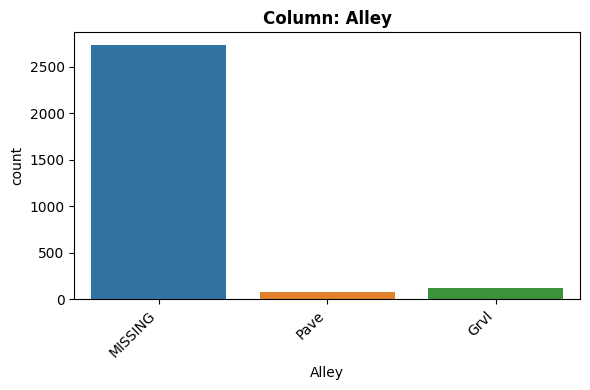

- NaN's Found: 2732 (93.24%)
- Unique Values: 3
- Most common value: 'MISSING' occurs 2732 times (93.24%)
- Not constant or quasi-constant.


In [143]:
explore_categorical(df, "Alley");